In [132]:
import os

In [133]:
os.getcwd()

'E:\\Machine_Learning\\Class_4'

In [134]:
os.chdir('E:\\Machine_Learning\\Class_4')

In [135]:
import pandas as pd

In [136]:
df=pd.read_csv('Height-Weight Data.csv')

In [137]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [138]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [139]:
import matplotlib.pyplot as plt

In [140]:
import numpy as np

Text(0, 0.5, 'Weight')

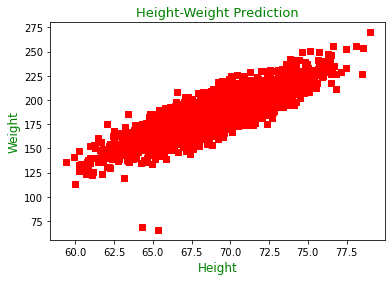

In [141]:
plt.scatter(df.Height,df.Weight,color="red",marker=',')
plt.title('Height-Weight Prediction',color='green',fontsize=13)
plt.xlabel('Height',color='green',fontsize=12)
plt.ylabel('Weight',color='green',fontsize=12)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x=df[['Height']]
y=df['Weight']

In [144]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.8)

In [145]:
xtrain.shape

(2800, 1)

In [146]:
ytrain.shape

(2800,)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
reg= LinearRegression()

In [149]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [150]:
df['output']=reg.predict(x)

In [151]:
df.head(20)

,Height,Weight,output
0,73.847017,241.893563,215.521354
1,68.781904,162.310473,185.403300
2,74.110105,212.740856,217.085724
3,71.730978,220.042470,202.939016
4,69.881796,206.349801,191.943451
5,67.253016,152.212156,176.312261
6,68.785081,183.927889,185.422192
7,68.348516,167.971111,182.826296
8,67.018950,175.929440,174.920463
9,63.456494,156.399676,153.737474


In [152]:
reg.coef_

array([5.94617613])

In [153]:
reg.intercept_

-223.5860157709683

In [154]:
reg.predict([[55]])

array([103.4536713])

Text(0, 0.5, 'Weight')

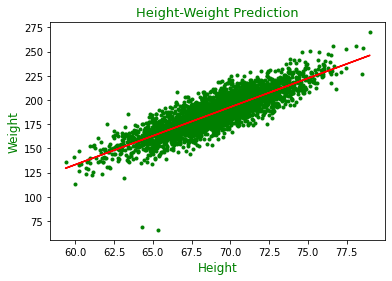

In [155]:
plt.plot(df.Height,df.output,color='red')
plt.scatter(df.Height,df.Weight,color="green",marker='.')
plt.title('Height-Weight Prediction',color='green',fontsize=13)
plt.xlabel('Height',color='green',fontsize=12)
plt.ylabel('Weight',color='green',fontsize=12)

In [156]:
reg.score(xtest,ytest)

0.739109013595012

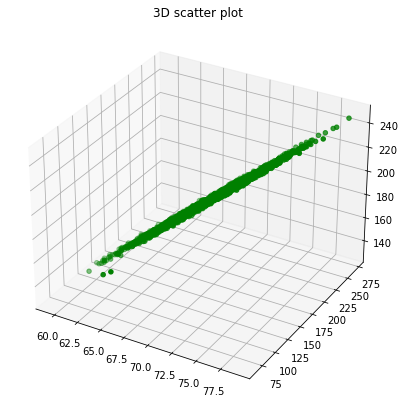

In [158]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = df.Height
y = df.Weight
z =df.output
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "green")
plt.title("3D scatter plot")
plt.show()